In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# specify encoding to avoid UnicodeDecodeError
df = pd.read_csv('zomato.csv', encoding='latin-1')
# df.head()
# df.columns
# df.head(2)
# df.info()
# df.describe() # ony numerical columns
# df.describe(include='all') # all columns including categorical columns
# df.info()


## Data Analysis 
1. missing value 
2. explore about numerical variable
3. explore about catagorical variable
4. finding relationship btw features

## imp methods 
1. is_null().sum()
2. .value_counts()
    **to know count of a preticular column/row**

In [13]:
# df.isnull().sum() # shows null values in each column
df.columns
# df.CountryCode.value_counts()
df['Country Code'].value_counts() #BETTER WAY THAN ABOVE
# df.shape




Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

In [14]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [15]:
{i for i in df.columns if df[i].isnull().sum()>0}

{'Cuisines'}

**Merge two diff dataframes or file then save it in another file**

In [17]:
# merge two diff data frames or files then save it to a new file
# df1 = pd.read_csv('zomato.csv', encoding='latin-1')
# df2 = pd.read_csv('zomato_reviews.csv', encoding='latin-1')
# df_merged = pd.merge(df1, df2, on='url', how='left') # left join
# df_merged.to_csv('zomato_full.csv', index=False)

In [ ]:
Zs_count = df['Country Code'].value_counts()
Zs_count

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

In [ ]:
Zs_count.values
zs_arr = Zs_count.values

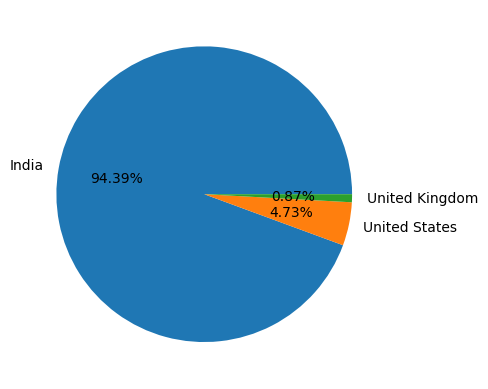

In [ ]:
plt.pie(zs_arr[:3], labels=['India', 'United States', 'United Kingdom'], autopct='%1.2f%%')
plt.show()
# plt.pie(zs_arr[:3], labels=[ :3], autopct='%1.2f%%')
# plt.show()

**observation** : India has highest number of zomato restaurants as compared to other countries.

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size() #group by multiple columns

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [26]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index() # to convert to dataframe
df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:' ratingcount'})
ratinggs = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:' ratingcount'})

**Oversavation on this dataset**
1. when rating btw 4.5 - 4.9 ---- exellent
2. when rating btw 3.5 - 4.5 ----  very good
3. when rating btw 3.5 - 3.9 ----   good
4. when rating btw 2.5 - 3.5 ----   average
5. when rating btw 0  - 2.5 ----   poor


<BarContainer object of 33 artists>

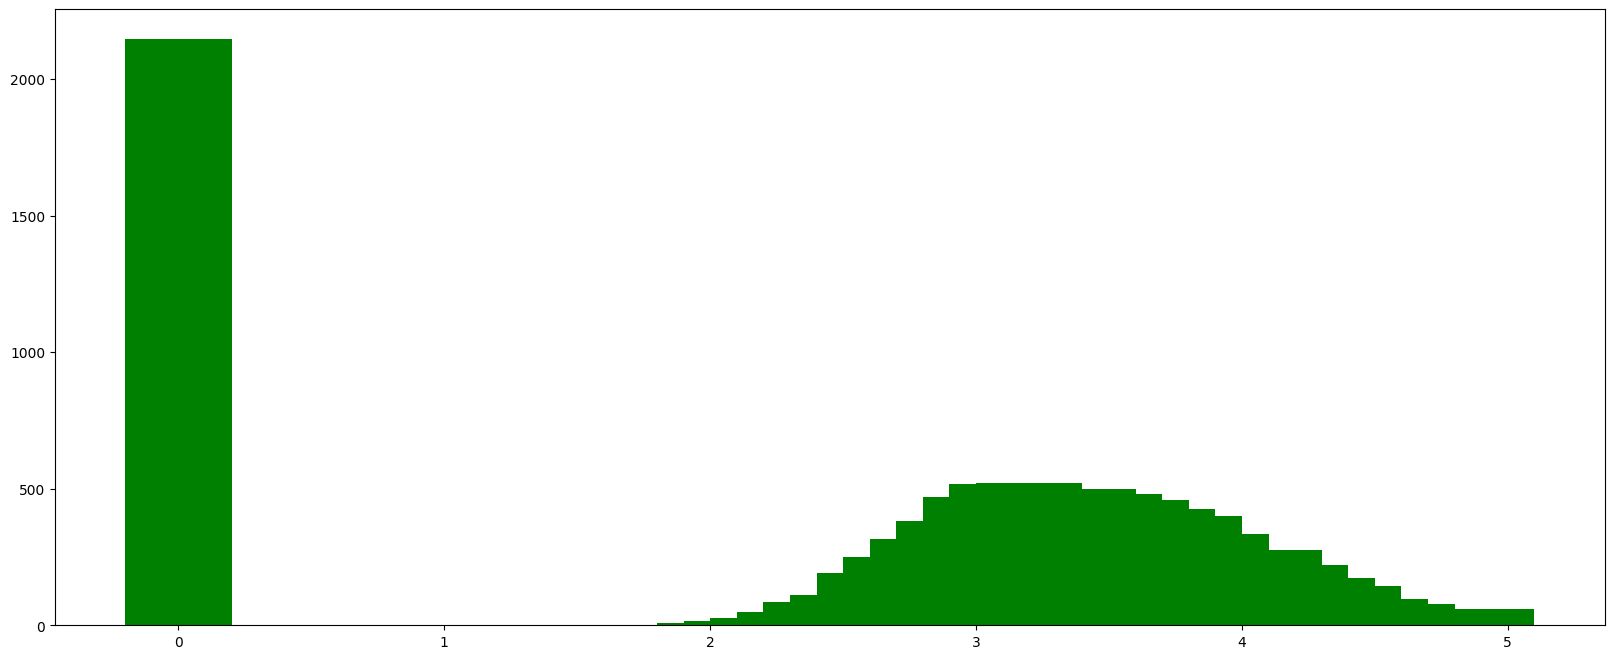

In [32]:
plt.figure(figsize=(20,8))
plt.bar(x=ratinggs['Aggregate rating'], height=ratinggs[' ratingcount'], color="green", width=0.4)